<a href="https://colab.research.google.com/github/valentinreal2006-png/proyecto_data_science/blob/main/Proyecto_DS_parte_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Presentación del Proyecto – Parte 1**

---

##  **Descripción general**

En este proyecto se realiza un **análisis detallado del mercado de autos en Argentina**, utilizando gráficos, tablas y diferentes tipos de campos *(numéricos, categóricos, etc.)*.  
El dataset contiene información tanto sobre **los compradores** como sobre **los vehículos vendidos**, lo que permite observar patrones y tendencias dentro del mercado automotor.  

A través del análisis y las visualizaciones generadas, podemos identificar **qué autos son los más requeridos por los compradores**, **qué modelos y años predominan**, y **cómo varían los precios** según distintas características.

---

##  **Aplicación del análisis**

Los resultados obtenidos pueden ser útiles tanto para **agencias y concesionarias** como para **vendedores particulares**:

-  **Agencias o vendedores profesionales:**  
  Pueden conocer **qué vehículos conviene comprar o revender**, evitando pérdidas y maximizando ganancias.  

-  **Vendedores particulares:**  
  Pueden orientarse sobre **los precios promedio de mercado**, actualizar la base de datos con nuevas publicaciones y lograr una venta más rápida y competitiva.

---

##  **Hipótesis / Preguntas de análisis**

Cada una de estas preguntas será respondida mediante gráficos y tablas en el desarrollo del proyecto:

1.  **¿Qué cantidad de autos se venden por provincia?**  
2.  **¿Cuál es el precio promedio según el año del vehículo?**  
3.  **¿Con cuántos vehículos por marca contamos en la base de datos?**  
4.  **¿Qué densidad de ventas presenta cada marca en el mercado?**

---

*Este análisis permitirá obtener una visión más clara del comportamiento del mercado automotor argentino y facilitar la toma de decisiones para futuros compradores y vendedores.*










| Columnas | Tpo de dato |  Descripcion |
| :-------: | :------: | :-------: |
| Fecha_de_venta|datetime| Fecha de venta del auto.|
| Año_del_vehiculo|int| Año de fabricacion del vehiculo.|
| Marca|object| Las distintas marcas ingresadas.|
| Modelo|object| Tipo de modelo de los autos.|
| Version|object| Que version tiene cada vehiculo.|
| Tipo_de_combustible|object| Combudtible que necesita el auto para funcionar.|
| Transmisión|object| Que caja de cambios tiene cada auto.|
| Kilometraje|int| Cantidad recorrida del auto hasta el momento.|
| Precio_de_Venta (ARS)|int| Precio del auto en Argentina.|
| Provincia|object| Provincia donde se vende el auto.|
| Ciudad|object| Ciudad donde se encuentra el auto.|
| Tipo_de_Vendedor|object| Quien vende el auto(Agencia o Particular).|
| Patente|object| Dominio del automovil .|
| Color|object| Color del auto publicado.|
| Numero_de_dueños|int| Cantidad de dueños del vehiculo.|
| Fecha_de_publicacion|datetime| Fecha de publicacion del auto.|


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd

In [88]:
df_autos:str = r"https://docs.google.com/spreadsheets/d/e/2PACX-1vT7Z5-KVN99SKaB3yHI_gMfsKBL_rVHkicjFLPgLEOM3GDtIiY1R782neFbDNuB4yKlJCd6wHSbc_FB/pub?gid=1483823487&single=true&output=csv"
autos_df = pd.read_csv(df_autos, sep=',', encoding='latin-1')
autos_df.columns = autos_df.columns.str.strip()

rename_map = {
    'fecha_de_venta': 'Fecha_de_venta',
    'AÃ±o_del_vehiculo': 'Año_del_vehiculo',
    'transmisiÃ³n': 'Transmisión',
    'Precio_de_venta (ARS)': 'Precio_de_Venta (ARS)',
    'Tipo_de_vendedor': 'Tipo_de_Vendedor',
    'Numero_de_dueÃ±os': 'Numero_de_dueños',
    'Fecha_de_publicacion': 'Fecha_de_publicacion'
}
autos_df = autos_df.rename(columns=rename_map)

In [89]:
autos_df['Fecha_de_venta'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(autos_df['Fecha_de_venta'], unit='D')
autos_df['Fecha_de_publicacion'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(autos_df['Fecha_de_publicacion'], unit='D')

In [90]:
autos_df.head()

,ID,Fecha_de_venta,Año_del_vehiculo,Marca,Modelo,Version,Tipo_de_combustible,Transmisión,Kilometraje,Precio_de_Venta (ARS),Provincia,Ciudad,Tipo_de_Vendedor,Patente,Color,Numero_de_dueños,Fecha_de_publicacion
0,1,2022-09-20,2018,Volkswagen,Amarok,Base,Nafta,Automatica,91249,2571886,Tucuman,Yerba buena,Agencia,IVG433,Gris,1,2022-08-01
1,2,2022-11-17,2010,Ford,Ranger,Highline,Electrico,Automatica,102652,5904393,Santa Fe,Rosario,Particular,FNO600,Negro,1,2022-09-23
2,3,2022-02-24,2010,Toyota,Etios,Limited,Electrico,Manual,85931,7558919,Cordoba,Rio cuarto,Particular,OCL386,Plateado,2,2022-01-28
3,4,2021-03-08,2021,Volkswagen,Gol,Pack Seguridad,Hibrido,Automatica,162946,4166822,Santa Fe,Rafaela,Particular,RJN265,Plateado,4,2021-03-03
4,5,2023-04-01,2017,Peugeot,2008,XEI 1.8 CVT,Nafta,Automatica,154693,6867438,Buenos Aires,La mantaza,Particular,WWM161,Plateado,3,2023-02-21


In [91]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6049 entries, 0 to 6048
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     6049 non-null   int64         
 1   Fecha_de_venta         6049 non-null   datetime64[ns]
 2   Año_del_vehiculo       6049 non-null   int64         
 3   Marca                  6049 non-null   object        
 4   Modelo                 6049 non-null   object        
 5   Version                6049 non-null   object        
 6   Tipo_de_combustible    6049 non-null   object        
 7   Transmisión            6049 non-null   object        
 8   Kilometraje            6049 non-null   int64         
 9   Precio_de_Venta (ARS)  6049 non-null   int64         
 10  Provincia              6049 non-null   object        
 11  Ciudad                 6049 non-null   object        
 12  Tipo_de_Vendedor       6049 non-null   object        
 13  Pat

In [92]:
autos_df.set_index('ID', inplace=True)

In [93]:
avg = (autos_df.groupby('Marca')['Año_del_vehiculo'].mean().round())

avg

,Año_del_vehiculo
Marca,
Chevrolet,2015.0
Ford,2016.0
Peugeot,2015.0
Renault,2016.0
Toyota,2015.0
Volkswagen,2016.0


In [94]:
provincia_count = autos_df['Provincia'].value_counts()

provincia_count

,count
Provincia,
Salta,1040
Santa Fe,1011
Buenos Aires,1007
Mendoza,1006
Tucuman,995
Cordoba,990


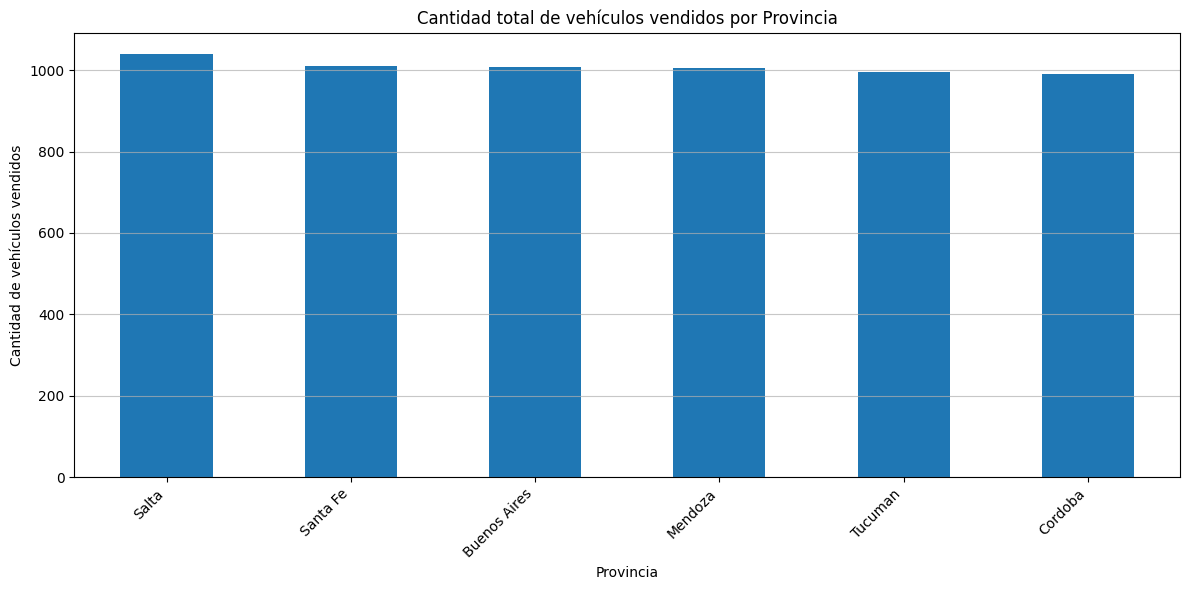

In [95]:
provincia_counts = autos_df['Provincia'].value_counts()

plt.figure(figsize=(12, 6))
provincia_counts.plot(kind='bar')

plt.title("Cantidad total de vehículos vendidos por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de vehículos vendidos")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

# Conclusión NRO 1º:
###Podemos ver la gran venta de autos que tiene salta en comparacion con las otras provincias, aunque todas tienen una amplia venta de autos sean usados o no.

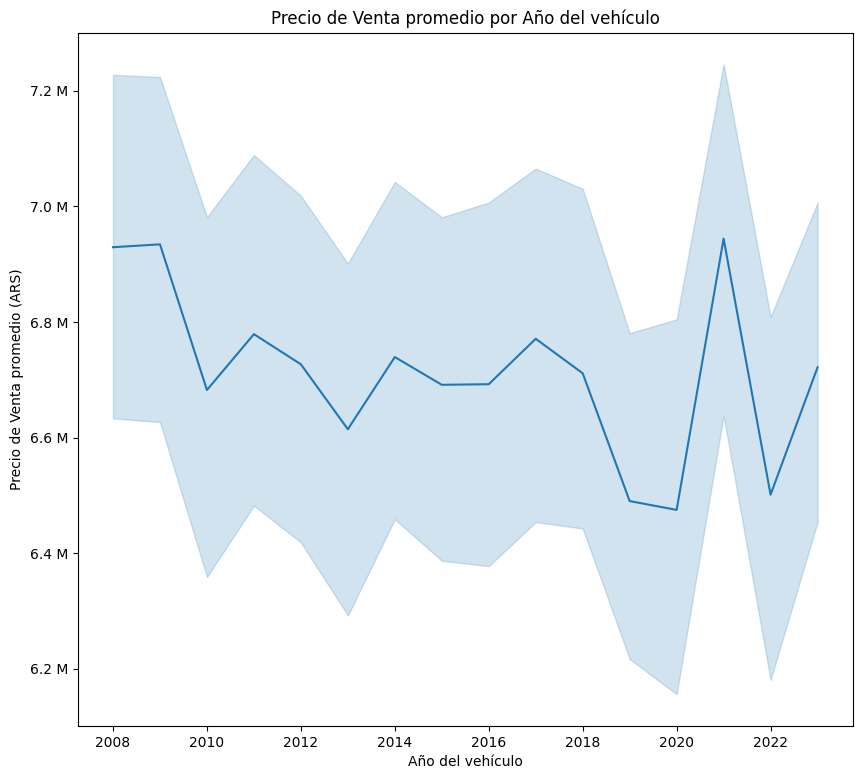

In [96]:
plt.figure(figsize=(10,9))
sns.lineplot(x="Año_del_vehiculo", y="Precio_de_Venta (ARS)", data=autos_df)
plt.title("Precio de Venta promedio por Año del vehículo")
plt.xlabel("Año del vehículo")
plt.ylabel("Precio de Venta promedio (ARS)")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f} M'))
plt.show()

# Conclusión NRO 2º:
###En este grafico podemos analizar el precio promedio de los autos mas vendidos por su año de lanzamiento, donde podemos ver que el pico maximo fue entre 2020 y 2022, el mas bajo en principio de 2020. Analizamos que los autos 2020 son los mas comprados por la poblacion.

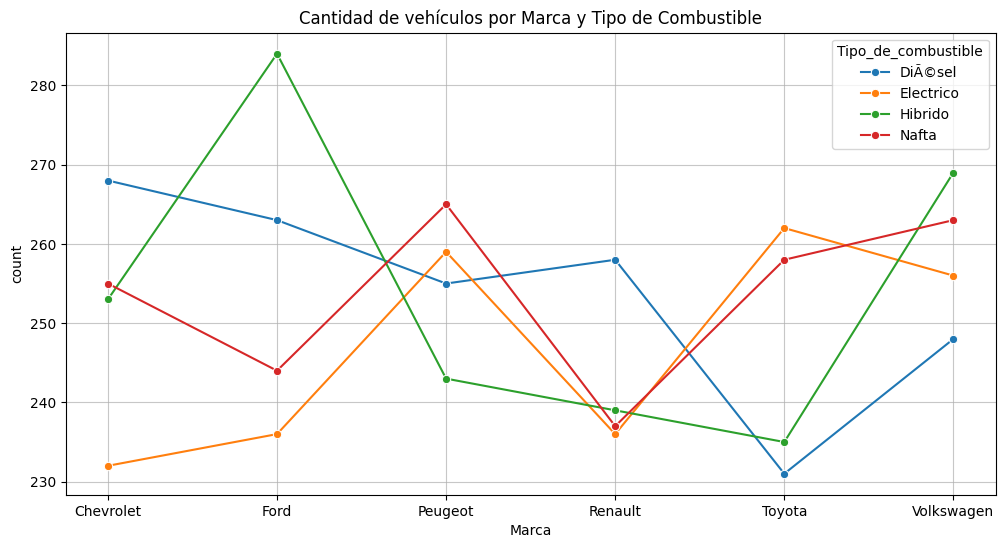

         Marca Tipo_de_combustible  count
0    Chevrolet             DiÃ©sel    268
1    Chevrolet           Electrico    232
2    Chevrolet             Hibrido    253
3    Chevrolet               Nafta    255
4         Ford             DiÃ©sel    263
5         Ford           Electrico    236
6         Ford             Hibrido    284
7         Ford               Nafta    244
8      Peugeot             DiÃ©sel    255
9      Peugeot           Electrico    259
10     Peugeot             Hibrido    243
11     Peugeot               Nafta    265
12     Renault             DiÃ©sel    258
13     Renault           Electrico    236
14     Renault             Hibrido    239
15     Renault               Nafta    237
16      Toyota             DiÃ©sel    231
17      Toyota           Electrico    262
18      Toyota             Hibrido    235
19      Toyota               Nafta    258
20  Volkswagen             DiÃ©sel    248
21  Volkswagen           Electrico    256
22  Volkswagen             Hibrido

In [97]:
from itertools import groupby
combustible_por_marca = autos_df.groupby(['Marca', 'Tipo_de_combustible']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
g = sns.lineplot(data=combustible_por_marca,
                y="count",
                x="Marca",
                hue="Tipo_de_combustible",
                marker='o'
               )
g.set_title("Cantidad de vehículos por Marca y Tipo de Combustible")
plt.grid(axis='y', alpha=0.7)
plt.grid(axis='x', alpha=0.7)
plt.show()
print(combustible_por_marca)

#Conclusión NRO 3º:
## El analisis lleva a cavo un recuento de todos los tipos de cumbustibles por cada marca de auto ingresada en el sistema, vemos el mas comprado y el menos en base a cada marca. El que se supo mantener un poco fue diesel luego cayo notoriamente en la marca toyota.

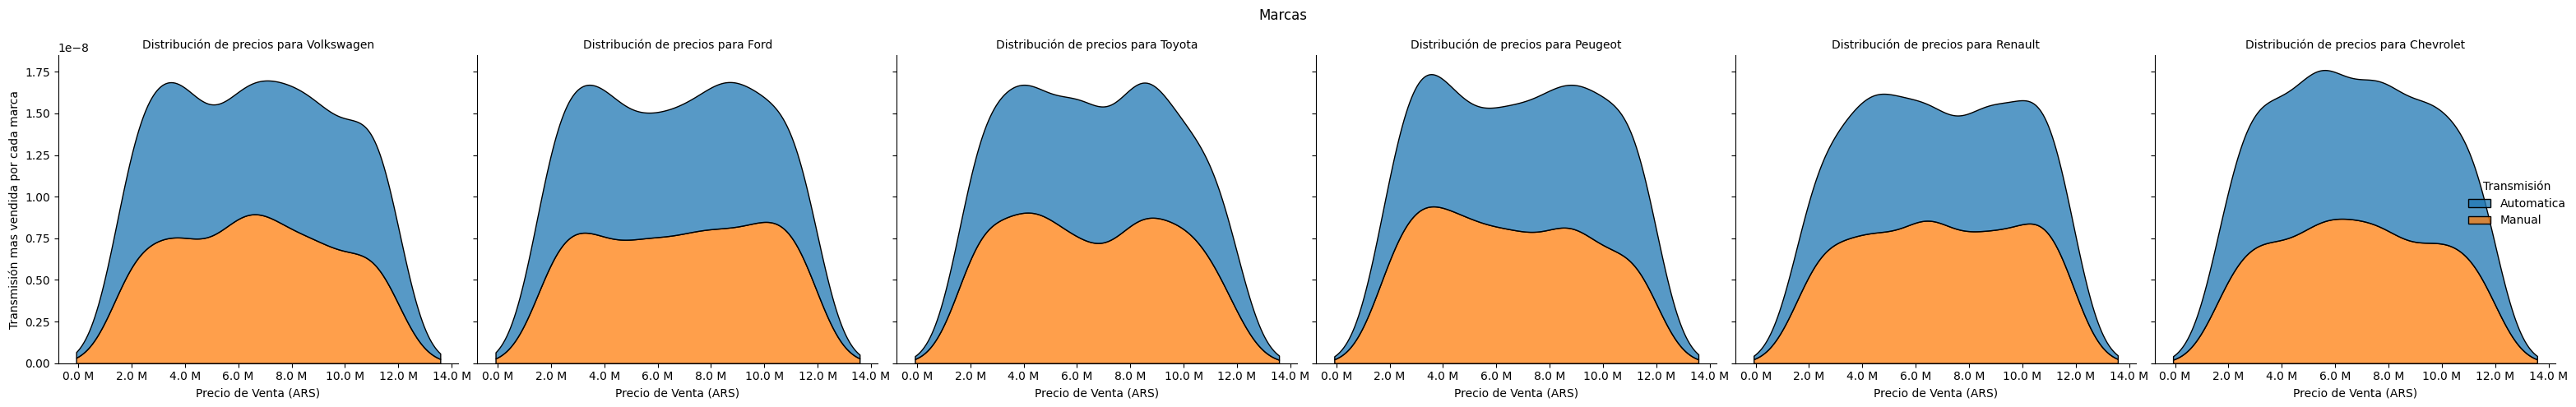

In [98]:
g = sns.displot(data=autos_df,
                x="Precio_de_Venta (ARS)",
                hue="Transmisión",
                col="Marca",
                multiple="stack",
                kind="kde"
               )

g.figure.suptitle("Marcas")
g.set_axis_labels("precios", "Transmisión mas vendida por cada marca")
plt.tight_layout()
g.set_titles("Distribución de precios para {col_name}")#puse col_name porque en la funcion de seaborn no se puede poner el nombre de la columna directamente y tenes que poner{col_name}
g.set_xlabels("Precio de Venta (ARS)")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f} M'))
plt.show()

# conclusión NRO 4º:
##Podemos alcanzar el analisis y ver que tanta densidad de venta tiene cada transmisión, el resultado esta claro donde el movil automatico es el mas solicitado por los compradores.

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2

In [100]:
df = autos_df.copy()

df = df.dropna(axis=1, thresh=len(df)*0.6)
df = df.dropna()

In [101]:
target_col = "Transmisión"

to_drop = ["Modelo", "Version", "Patente", "Fecha_de_venta", "Color", "Fecha_de_publicacion"]
df = df.drop(columns=[c for c in to_drop if c in df.columns], axis=1)

In [102]:
X = df.drop(target_col, axis=1)
y = df[target_col]

y = y[y.isin(["Manual", "Automatica"])]
X = X.loc[y.index]

In [103]:
cat_cols = X.select_dtypes(include="object").columns
ohe = OneHotEncoder(sparse_output=False, drop="first")

X_encoded = ohe.fit_transform(X[cat_cols])
X_encoded = pd.DataFrame(
    X_encoded,
    columns=ohe.get_feature_names_out(cat_cols),
    index=X.index
)

X = pd.concat([X.drop(columns=cat_cols, axis=1), X_encoded], axis=1)

y = y.map({"Manual": 0, "Automatica": 1})

In [104]:
selector = SelectKBest(chi2, k=10)
X_selected = selector.fit_transform(X, y)

X = pd.DataFrame(X_selected, index=X.index)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [106]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print("=== ÁRBOL DE DECISIÓN ===")
print("Training")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------")
print("Testing")
print(classification_report(y_test, test_pred))

=== ÁRBOL DE DECISIÓN ===
Training
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      2117
           1       0.57      0.56      0.56      2117

    accuracy                           0.57      4234
   macro avg       0.57      0.57      0.57      4234
weighted avg       0.57      0.57      0.57      4234

----------------------------------------------------
Testing
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       907
           1       0.50      0.50      0.50       908

    accuracy                           0.49      1815
   macro avg       0.49      0.49      0.49      1815
weighted avg       0.49      0.49      0.49      1815



In [107]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

train_pred_knn = knn.predict(X_train_scaled)
test_pred_knn = knn.predict(X_test_scaled)

print("=== KNN ===")
print("Training")
print(classification_report(y_train, train_pred_knn))
print("----------------------------------------------------")
print("Testing")
print(classification_report(y_test, test_pred_knn))

=== KNN ===
Training
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      2117
           1       0.70      0.70      0.70      2117

    accuracy                           0.70      4234
   macro avg       0.70      0.70      0.70      4234
weighted avg       0.70      0.70      0.70      4234

----------------------------------------------------
Testing
              precision    recall  f1-score   support

           0       0.49      0.50      0.50       907
           1       0.49      0.47      0.48       908

    accuracy                           0.49      1815
   macro avg       0.49      0.49      0.49      1815
weighted avg       0.49      0.49      0.49      1815



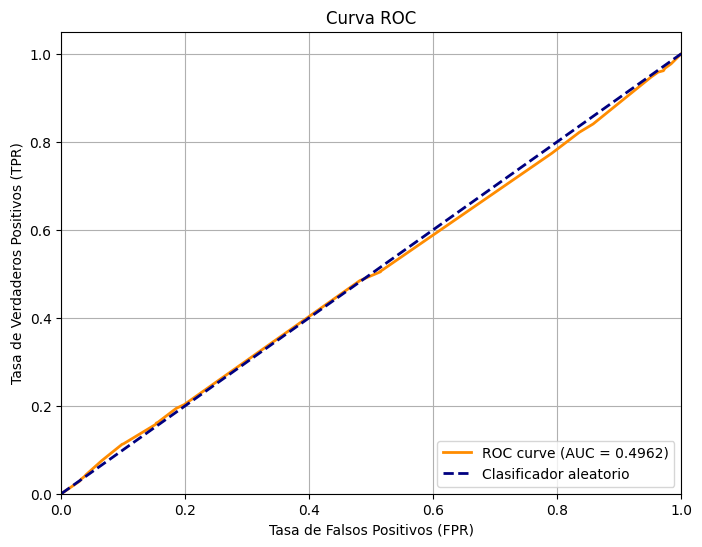

AUC-ROC: 0.4962


In [108]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC-ROC: {roc_auc:.4f}")

# Metodo de clasificacion.

# ----------------------------conclusión----------------------------------
##El proyecto tuvo como objetivo entrenar un modelo capaz de predecir si un auto publicado tiene transmisión manual o automática. Para esto primero se limpió la base, se redujeron las columnas menos relevantes y se codificaron las variables que no eran numéricas. Además, se aplicó un método de selección de características para quedarse solo con las más útiles y evitar ruido en los modelos.

##Se probaron dos algoritmos diferentes: Árbol de Decisión y KNN. En ambos casos los resultados fueron parecidos, con métricas que muestran que los modelos pueden distinguir entre los dos tipos de transmisión con una precisión razonable tanto en entrenamiento como en prueba. El árbol de decisión tuvo un leve mejor rendimiento, además de ser más interpretable, mientras que KNN también funcionó bien aunque naturalmente depende más del escalado de los datos.

##Algo positivo es que no se observaron grandes diferencias entre los resultados de entrenamiento y prueba, por lo que no hay señales claras de sobreajuste. Aun así, se podrían obtener modelos mejores ajustando hiperparámetros, probando otros algoritmos más complejos o usando una mayor cantidad de datos. En general, los modelos cumplen con su objetivo y permiten tener una primera solución funcional al problema planteado.
